In [1]:
get_ipython().run_line_magic('matplotlib', 'nbagg')

import matplotlib.pyplot as plt
import pandas as pd
import cPickle, gzip, numpy, random
f = gzip.open('mnist.pkl.gz', 'rb')
train_set, valid_set, test_set = cPickle.load(f)
f.close()

In [2]:
w=numpy.zeros((10,784))
b=numpy.zeros((10))
l=0.2
nrIterations=5

In [3]:
while (nrIterations>0):
    print nrIterations
    for x,t in zip(train_set[0],train_set[1]):
        z = numpy.asmatrix(x)*numpy.transpose(w) + b
        tarray = [0] * 10
        tarray[t] = 1
        zarray= [0] * 10
        zarray[numpy.argmax(z)]=1
        aux = numpy.asmatrix(tarray)-numpy.asmatrix(zarray)
        w = w + numpy.transpose(aux) * numpy.asmatrix(x) * l
        b = b + aux * l
    nrIterations=nrIterations-1

5
4
3
2
1


In [4]:
nrok=0
rez = 10*[10*[0]]
digit_target=[]
digit_predicted=[]
for x,t in zip(test_set[0],test_set[1]):
    z = numpy.asmatrix(x)*numpy.transpose(w) + b
    tarray = [0] * 10
    tarray[t] = 1
    aux = (tarray-z)
    digit_predicted.append(numpy.argmin(aux))
    digit_target.append(t)
    if (t==numpy.argmin(aux)):
        nrok=nrok+1
print 'Acuratete: ', nrok/100.


Acuratete:  86.45


Predicted    0     1    2    3    4    5    6    7    8    9
Actual                                                      
0          970     0    1    2    0    2    2    3    0    0
1            0  1107    5    1    0    4    0    3   15    0
2           19     8  895   24    8    4    6   25   40    3
3            4     0   21  875    0   58    0   23   22    7
4            5     6    5    4  861   10    1   42    8   40
5           20     3    5   40    7  772    3   15   27    0
6           53     3   13    2   12  100  737    9   29    0
7            2     9   12    5    1    0    0  986    2   11
8           23    20    4   22   12   86    3   33  758   13
9           15     9    0    4   28   32    0  228    9  684


<IPython.core.display.Javascript object>


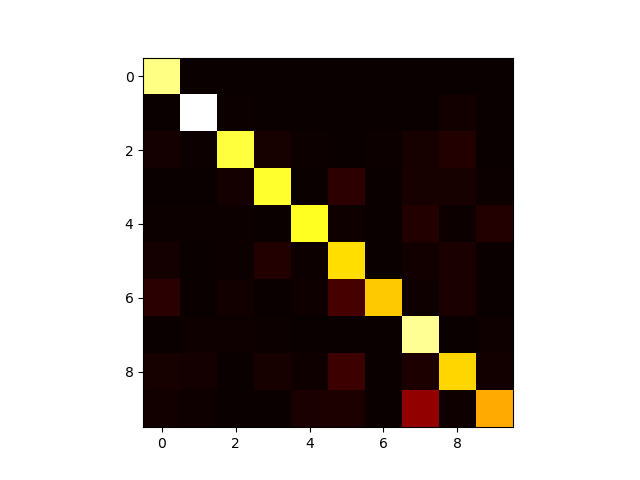

In [5]:
y_actu = pd.Series(digit_target, name='Actual')
y_pred = pd.Series(digit_predicted, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
print df_confusion
plt.figure()
plt.imshow(df_confusion,cmap='hot', interpolation='nearest')

<IPython.core.display.Javascript object>


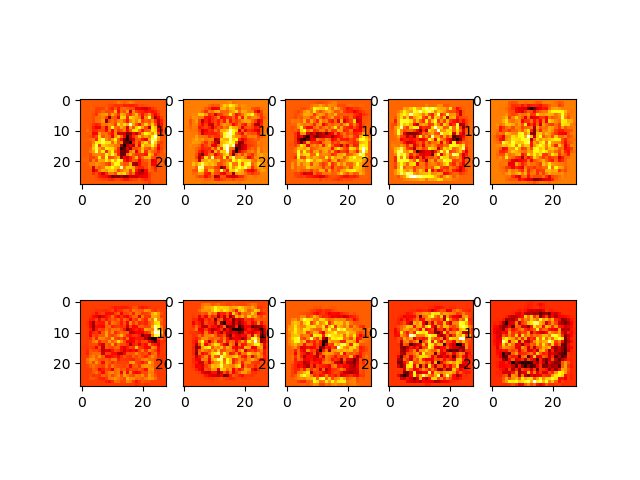

In [6]:
import matplotlib.image as mpimg
fig = plt.figure()
for i in range (0,10):
    a=fig.add_subplot(2,5,1+i)
    lum_img = w[i].reshape(28,28)
    imgplot = plt.imshow(lum_img, cmap='hot', interpolation='nearest') #cu si fara interpolation